# Objective

Confirm the number of replicates we have been using in our experiments.

# Takeaway

We seem to have been consistently requesting 25 replicates for each image. For some images, some workers do not contribute but somehow get their IDs stamped in, anyway.

In [43]:
import sys, os, json
sys.path.insert(0, '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation')
from QuantiusAnnotation import QuantiusAnnotation
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
json_filenames = []
for json_filename in os.listdir('/Users/jenny.vo-phamhi/Documents/fish_annotation_paper/all_json'):
    if json_filename.endswith('.json'):
        json_filenames.append(json_filename)

In [45]:
num_workers = []
for json_filename in json_filenames:
    to_return = pd.DataFrame()
    json_string = open(json_filename).read()
    results = json.loads(json_string)

    for worker in results:

        # Skip the worker if they didn't perform any annotations
        if not worker['raw_data']: 
            continue

        # Make a data frame of the coordinates of each annotation
        if (worker['annotation_type'] == 'crosshairs'):
            coords = pd.DataFrame(worker['raw_data'][0])
        elif (worker['annotation_type'] == 'polygon'):
            num_annotations = len(worker['raw_data'])
            annotations = []
            for i in range(num_annotations):
                annotation = worker['raw_data'][i]
                annotation = pd.DataFrame(annotation)
                annotations.append(annotation)
            coords = pd.DataFrame(annotations)

        # Add the worker metadata to all entries in the data frame
        coords['image_filename'] = worker['image_filename']
        coords['worker_id'] = worker['worker_id']

        # Append to the total data frame
        to_return = to_return.append(coords)
    image_filenames = np.unique(to_return.loc[:, ['image_filename']])
    
    for image_filename in image_filenames:
        image_slice = to_return[to_return.image_filename == image_filename]
        worker_ids = np.unique(image_slice.loc[:, ['worker_id']])
        num_workers.append(len(worker_ids))

Text(0.5,0,'Num workers accounted for in the Quantius result json file')

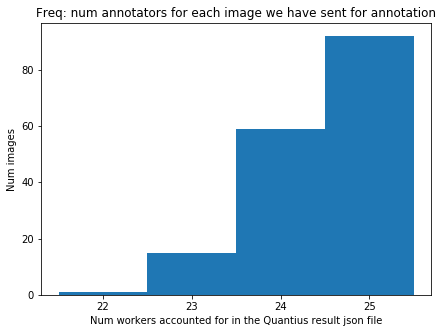

In [46]:
plt.figure(figsize=(7, 5))
plt.hist(num_workers, bins=np.arange(21.5, 26, 1))
plt.xticks([22, 23, 24, 25])
plt.title('Freq: num annotators for each image we have sent for annotation')
plt.ylabel('Num images')
plt.xlabel('Num workers accounted for in the Quantius result json file')

Text(0.5,0,'Num workers accounted for in the Quantius result json file')

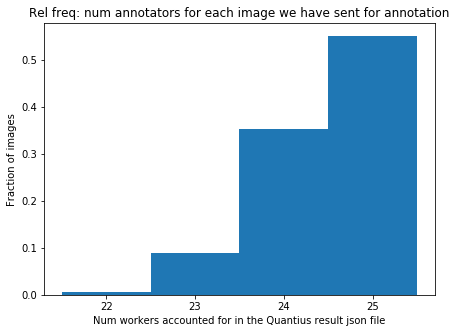

In [47]:
plt.figure(figsize=(7, 5))
plt.hist(num_workers, bins=np.arange(21.5, 26, 1), weights=np.zeros_like(num_workers) + 1. / np.asarray(num_workers).size)
plt.xticks([22, 23, 24, 25])
plt.title('Rel freq: num annotators for each image we have sent for annotation')
plt.ylabel('Fraction of images')
plt.xlabel('Num workers accounted for in the Quantius result json file')